In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("talk")
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,6)

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [67]:
test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))
#we have shop_id and item_id

In [81]:
aggdata=transactions.drop(columns=["date","item_price"]).groupby(["date_block_num","shop_id","item_id"]).sum().reset_index()

In [42]:
strip=(shops
.assign(shop_simp=lambda x: x.shop_name.str.lower().str.replace(r'[,)("!-.?²]', " ").str.strip().str.split()  
        
       )
)

In [43]:
def catter(x):
    return pd.DataFrame({i:[1] for i in x})
haha=pd.concat(strip.shop_simp.apply(catter).values).fillna(0).reset_index(drop=True)

In [48]:
from sklearn.decomposition import NMF

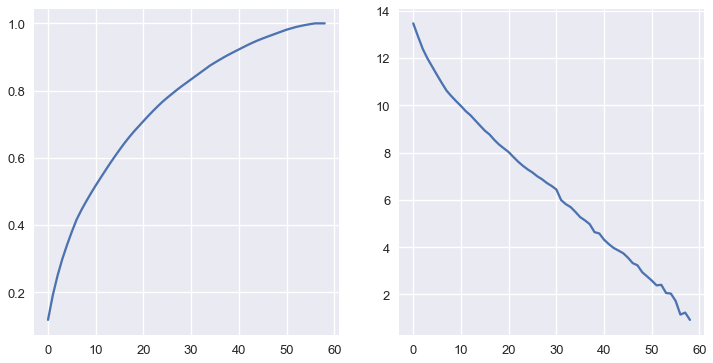

In [44]:
errs=[]
errs2=[]
for i in range(1,60):
    nmf=NMF(n_components=i)
    nmf.fit(X=haha)
    pca=PCA(n_components=i)
    pca.fit(haha)
    errs.append(pca.explained_variance_ratio_.cumsum().max())
    errs2.append(nmf.reconstruction_err_)
plt.subplot(1,2,1)
plt.plot(errs)
plt.subplot(1,2,2)
plt.plot(errs2)
#40

In [67]:
nmf=NMF(n_components=20)
nmf.fit(X=haha)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=2, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [73]:
pd.concat([shops,pd.DataFrame(nmf.transform(haha))],axis=1)

,shop_name,shop_id,0,1
0,"!Якутск Орджоникидзе, 56 фран",0,0.041507,0.000000e+00
1,"!Якутск ТЦ ""Центральный"" фран",1,0.413604,0.000000e+00
2,"Адыгея ТЦ ""Мега""",2,0.468990,0.000000e+00
3,"Балашиха ТРК ""Октябрь-Киномир""",3,0.006289,0.000000e+00
4,"Волжский ТЦ ""Волга Молл""",4,0.387886,4.630267e-02
5,"Вологда ТРЦ ""Мармелад""",5,0.000000,5.088833e-01
6,"Воронеж (Плехановская, 13)",6,0.000000,1.123785e-01
7,"Воронеж ТРЦ ""Максимир""",7,0.000000,5.755953e-01
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,0.000000,7.284786e-01
9,Выездная Торговля,9,0.000000,0.000000e+00


In [5]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [45]:
strip=(item_categories
.assign(item_simp=lambda x: x.item_category_name.str.lower().str.replace(r'[,)("!-.?²/*:+]', " ").str.strip().str.split()  
        
       )
)
strip

,item_category_name,item_category_id,item_simp
0,PC - Гарнитуры/Наушники,0,"[pc, гарнитуры, наушники]"
1,Аксессуары - PS2,1,"[аксессуары, ps2]"
2,Аксессуары - PS3,2,"[аксессуары, ps3]"
3,Аксессуары - PS4,3,"[аксессуары, ps4]"
4,Аксессуары - PSP,4,"[аксессуары, psp]"
5,Аксессуары - PSVita,5,"[аксессуары, psvita]"
6,Аксессуары - XBOX 360,6,"[аксессуары, xbox, 360]"
7,Аксессуары - XBOX ONE,7,"[аксессуары, xbox, one]"
8,Билеты (Цифра),8,"[билеты, цифра]"
9,Доставка товара,9,"[доставка, товара]"


In [46]:
def catter(x):
    return pd.DataFrame({i:[1] for i in x}).astype(np.uint8)
haha=pd.concat(strip.item_simp.apply(catter).values).fillna(0).astype(np.uint8).reset_index(drop=True)

In [13]:
haha

,1с,360,3d,4k,8,android,blu,cd,dvd,live,...,услуги,фигурки,фирменного,художественная,цифра,чистые,шпиль,штучные,элементы,энциклопедии
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.decomposition import NMF as nmf
from sklearn.decomposition import PCA
nmf=NMF(n_components=20)
nmf.fit(X=haha)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=20, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [30]:
nmf.explained_variance_ratio_.cumsum().max()

0.94843984547971982

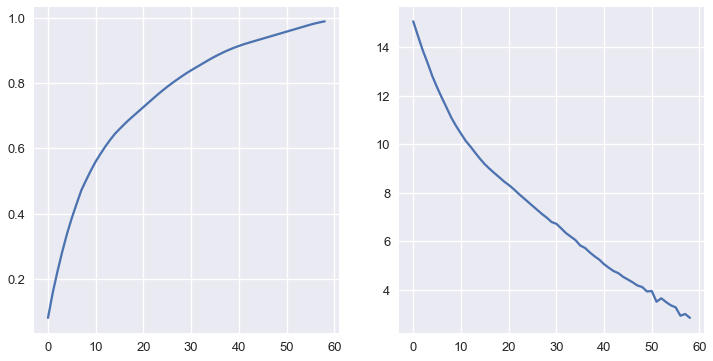

In [47]:
errs=[]
errs2=[]
for i in range(1,60):
    nmf=NMF(n_components=i)
    nmf.fit(X=haha)
    pca=PCA(n_components=i)
    pca.fit(haha)
    errs.append(pca.explained_variance_ratio_.cumsum().max())
    errs2.append(nmf.reconstruction_err_)
plt.subplot(1,2,1)
plt.plot(errs)
plt.subplot(1,2,2)
plt.plot(errs2)
#40

In [21]:
nmf=NMF(n_components=3)
nmf.fit(X=haha)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=3, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [22]:
pd.concat([item_categories,pd.DataFrame(nmf.transform(haha))],axis=1)

,item_category_name,item_category_id,0,1,2
0,PC - Гарнитуры/Наушники,0,1.219752e-01,0.000000,0.000000e+00
1,Аксессуары - PS2,1,4.807586e-02,0.087300,0.000000e+00
2,Аксессуары - PS3,2,4.807586e-02,0.087300,0.000000e+00
3,Аксессуары - PS4,3,4.807586e-02,0.087300,0.000000e+00
4,Аксессуары - PSP,4,4.807586e-02,0.087300,0.000000e+00
5,Аксессуары - PSVita,5,4.807586e-02,0.087300,0.000000e+00
6,Аксессуары - XBOX 360,6,7.997575e-02,0.245313,0.000000e+00
7,Аксессуары - XBOX ONE,7,7.997575e-02,0.245313,0.000000e+00
8,Билеты (Цифра),8,9.029268e-02,0.000000,1.477833e-01
9,Доставка товара,9,0.000000e+00,0.000000,0.000000e+00


In [14]:
strip=(items
.assign(item_simp=lambda x: x.item_name.str.lower().str.replace(r'[\[,)("!-.?²/*:+\]‘…–_]', " ").str.strip().str.split()  
        
       )
)
strip

,item_name,item_id,item_category_id,item_simp
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,"[во, власти, наваждения, пласт, d]"
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,"[abbyy, finereader, 12, professional, edition,..."
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,"[в, лучах, славы, unv, d]"
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,"[голубая, волна, univ, d]"
4,***КОРОБКА (СТЕКЛО) D,4,40,"[коробка, стекло, d]"
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,"[новые, американские, граффити, uni, d]"
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40,"[удар, по, воротам, uni, d]"
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40,"[удар, по, воротам, 2, uni, d]"
8,***ЧАЙ С МУССОЛИНИ D,8,40,"[чай, с, муссолини, d]"
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40,"[шугарлэндский, экспресс, uni, d]"


In [15]:
from collections import Counter
from itertools import chain
words=pd.Series(Counter(chain(*strip.item_simp))).reset_index()
words.columns=["index","count"]

In [33]:
words=words.query("count>1").reset_index(drop=True)

In [34]:
dic=words["index"].to_dict()
word_dic={i:j for j,i in dic.items()}

In [35]:
dic

{0: '0',
 1: '000',
 2: '00002',
 3: '00003',
 4: '00005',
 5: '00008',
 6: '00010',
 7: '00011',
 8: '00012',
 9: '00013',
 10: '00014',
 11: '00016',
 12: '00018',
 13: '00019',
 14: '00020',
 15: '00021',
 16: '00028',
 17: '00062',
 18: '007',
 19: '008',
 20: '0083',
 21: '01',
 22: '02',
 23: '03',
 24: '04',
 25: '05',
 26: '06',
 27: '07',
 28: '08',
 29: '09',
 30: '1',
 31: '10',
 32: '100',
 33: '1000',
 34: '1001',
 35: '1008',
 36: '1008za01',
 37: '100cm',
 38: '101',
 39: '1010',
 40: '1012',
 41: '1015',
 42: '1080p',
 43: '10c',
 44: '10cd',
 45: '10dvd',
 46: '10см',
 47: '11',
 48: '110',
 49: '1108a',
 50: '1108za01',
 51: '11bd',
 52: '11cd',
 53: '11dvd',
 54: '11кл',
 55: '11см',
 56: '12',
 57: '120',
 58: '1203',
 59: '1208a',
 60: '1208b',
 61: '123',
 62: '125',
 63: '127',
 64: '12cd',
 65: '12x',
 66: '12см',
 67: '13',
 68: '138',
 69: '13th',
 70: '13см',
 71: '14',
 72: '14cd',
 73: '14см',
 74: '15',
 75: '1500',
 76: '15a',
 77: '15cd',
 78: '15мб',
 7

In [36]:
def catter(x):
    base = np.zeros(words.shape[0],dtype=np.uint8)
    ones=[word_dic[i] for i in x if i in word_dic.keys()]
    base[ones]=1
    return base
stacked=np.stack(strip.item_simp.apply(catter).values)

In [37]:
from scipy.sparse import csr_matrix
stacked_s=csr_matrix(stacked)

In [118]:
import pickle
with open("pickled_items","wb") as file:
    pickle.dump(stacked_s,file)

In [3]:
import pickle
with open("pickled_items","rb") as file:
    stacked_s=pickle.load(file) 

In [41]:
stacked_s

<22170x9689 sparse matrix of type '<class 'numpy.uint8'>'
	with 129271 stored elements in Compressed Sparse Row format>

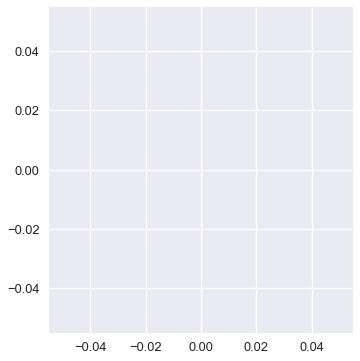

In [43]:
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
errs=[]
errs2=[]
for i in [100]:
    nmf=NMF(n_components=i)
    nmf.fit(X=stacked_s)
    #pca=TruncatedSVD(n_components=i)
   # pca.fit(stacked_s)
   # errs.append(pca.explained_variance_ratio_.cumsum().max())
    #errs2.append(nmf.reconstruction_err_)
plt.subplot(1,2,1)
plt.plot(errs)
#plt.subplot(1,2,2)
#plt.plot(errs2)
#40

In [46]:
t=pd.concat([items,pd.DataFrame(nmf.transform(stacked_s))],axis=1)

In [50]:
bach=nmf.inverse_transform(nmf.transform(stacked_s))

In [52]:
bach.shape

(22170, 9689)

In [53]:
stacked_s.shape

(22170, 9689)

In [55]:
(bach-stacked_s).sum()

39797.254710312154